## Step 3: Exploratory Data Analysis

#### Installing plotly

In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
pio.renderers.default='browser'
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Importing table for EDA

The following is resultant table of web scraping and data cleaning imported from player_mvp_stats.csv.

In [3]:
path = r'C:\Users\deshi\Code\cemetery-of-culture\year-2\machine-learning\project\mvps.csv'

stats = pd.read_csv(path, index_col=0)

In [4]:
stats

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


#### Rudimentary Analysis of the data frame

In [5]:
# Find top 5 results from the table
stats.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [6]:
# Printing basic info about the table
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 14
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     474 non-null    object 
 1   Player   474 non-null    object 
 2   Age      474 non-null    int64  
 3   Tm       474 non-null    object 
 4   First    474 non-null    float64
 5   Pts Won  474 non-null    float64
 6   Pts Max  474 non-null    int64  
 7   Share    474 non-null    float64
 8   G        474 non-null    int64  
 9   MP       474 non-null    float64
 10  PTS      474 non-null    float64
 11  TRB      474 non-null    float64
 12  AST      474 non-null    float64
 13  STL      474 non-null    float64
 14  BLK      474 non-null    float64
 15  FG%      474 non-null    float64
 16  3P%      463 non-null    float64
 17  FT%      474 non-null    float64
 18  WS       474 non-null    float64
 19  WS/48    474 non-null    float64
 20  Year     474 non-null    int64  
dtypes: float64(14), i

In [7]:
# Print summary stats of each feature in the table
stats.describe()

,Age,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,463.000000,474.000000,474.000000,474.000000,474.000000
mean,27.729958,7.544304,196.105485,1153.312236,0.170030,72.962025,36.405063,22.298945,7.501899,5.212447,1.401477,0.970464,0.486865,0.300773,0.781213,10.874895,0.195485,2004.957806
std,3.859979,22.870329,316.020240,111.589513,0.272154,10.570344,3.044097,5.132908,3.282469,2.722344,0.539495,0.908948,0.045383,0.126598,0.095520,3.364373,0.047327,8.856043
min,19.000000,0.000000,1.000000,960.000000,0.001000,17.000000,25.600000,4.700000,1.900000,0.800000,0.200000,0.000000,0.384000,0.000000,0.422000,2.300000,0.065000,1991.000000
25%,25.000000,0.000000,4.000000,1010.000000,0.003000,68.000000,34.600000,19.200000,4.725000,3.000000,1.000000,0.300000,0.456000,0.272000,0.737000,8.800000,0.165250,1997.000000
50%,28.000000,0.000000,26.000000,1210.000000,0.024500,77.000000,36.800000,22.500000,6.950000,4.800000,1.400000,0.600000,0.483500,0.334000,0.796000,10.700000,0.195000,2004.000000
75%,30.000000,1.000000,260.250000,1240.000000,0.230250,81.000000,38.400000,26.100000,10.275000,6.975000,1.800000,1.375000,0.512750,0.378500,0.848000,13.000000,0.224000,2012.000000
max,38.000000,131.000000,1310.000000,1310.000000,1.000000,82.000000,43.700000,36.100000,18.700000,14.200000,3.000000,4.500000,0.675000,1.000000,0.948000,20.400000,0.322000,2021.000000


In [8]:
# Checking to find any duplicate values
# The sum would give the count of duplicates (if any)
stats.duplicated().sum()

0

In [9]:
# Find null values in the data
stats.isnull().sum()

Rank        0
Player      0
Age         0
Tm          0
First       0
Pts Won     0
Pts Max     0
Share       0
G           0
MP          0
PTS         0
TRB         0
AST         0
STL         0
BLK         0
FG%         0
3P%        11
FT%         0
WS          0
WS/48       0
Year        0
dtype: int64

In [10]:
# Replacing null values
stats.replace(np.nan,'0',inplace = True)
 
# Checking if changes reflected
stats.isnull().sum()

Rank       0
Player     0
Age        0
Tm         0
First      0
Pts Won    0
Pts Max    0
Share      0
G          0
MP         0
PTS        0
TRB        0
AST        0
STL        0
BLK        0
FG%        0
3P%        0
FT%        0
WS         0
WS/48      0
Year       0
dtype: int64

## Applying filters to the data frame

#### Finding out which of the players has greater than 40 Minutes Played a game on average

In [11]:
# Filtering the data to find out which players had more than 40 minutes played per game on average
stats[stats['MP'] > 40]

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
5,6,Chris Mullin,28,GSW,0.0,81.0,960,0.084,81,41.3,...,5.6,3.5,2.1,0.8,0.524,0.366,0.833,10.8,0.155,1992
7,8,Tim Hardaway,25,GSW,0.0,64.0,960,0.067,81,41.1,...,3.8,10.0,2.0,0.2,0.461,0.338,0.766,9.2,0.132,1992
9,10,Dennis Rodman,30,DET,0.0,26.0,960,0.027,82,40.3,...,18.7,2.3,0.8,0.9,0.539,0.317,0.600,12.6,0.183,1992
11,10T,Joe Dumars,29,DET,0.0,1.0,980,0.001,77,40.2,...,1.9,4.0,1.0,0.1,0.466,0.375,0.864,9.1,0.141,1993
0,1,Hakeem Olajuwon,31,HOU,66.0,889.0,1010,0.880,80,41.0,...,11.9,3.6,1.6,3.7,0.528,0.421,0.716,14.3,0.210,1994
1,2,David Robinson,28,SAS,24.0,730.0,1010,0.723,80,40.5,...,10.7,4.8,1.7,3.3,0.507,0.345,0.749,20.0,0.296,1994
7,7T,Karl Malone,30,UTA,0.0,17.0,1010,0.017,82,40.6,...,11.5,4.0,1.5,1.5,0.497,0.25,0.694,13.4,0.193,1994
13,11T,Latrell Sprewell,23,GSW,0.0,1.0,1010,0.001,82,43.1,...,4.9,4.7,2.2,0.9,0.433,0.361,0.774,8.0,0.108,1994
8,9T,Grant Hill,23,DET,0.0,63.0,1130,0.056,80,40.8,...,9.8,6.9,1.3,0.6,0.462,0.192,0.751,11.7,0.172,1996


#### Finding out who the oldest players to ever play in the league are

In [12]:
above25 = stats[stats['Age'] > 25]
stats.sort_values(by=['Age'], ascending=False).head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
9,10T,Tim Duncan,38,SAS,0.0,1.0,1300,0.001,77,28.9,...,9.1,3.0,0.8,2.0,0.512,0.286,0.740,9.6,0.207,2015
16,15T,John Stockton,38,UTA,0.0,1.0,1240,0.001,82,29.2,...,2.8,8.7,1.6,0.3,0.504,0.462,0.817,10.8,0.216,2001
12,13,Michael Jordan,38,WAS,0.0,16.0,1260,0.013,60,34.9,...,5.7,5.2,1.4,0.4,0.416,0.189,0.790,3.3,0.075,2002
6,7,Karl Malone,37,UTA,0.0,21.0,1240,0.017,81,35.7,...,8.3,4.5,1.1,0.8,0.498,0.4,0.793,13.1,0.217,2001
11,12T,Tim Duncan,37,SAS,0.0,21.0,1250,0.017,74,29.2,...,9.7,3.0,0.6,1.9,0.490,0.0,0.731,7.4,0.164,2014


## Univariate Analysis

#### Bar graphs that shows how many players have played for a team over the years

In [16]:
fig = px.bar(
    stats.groupby(
        'Tm', as_index=False
    )[['Player']].count(), y="Player", x='Tm'
)
fig.show()

#### Representing the number of players for a team over the years in a pie chart

In [17]:
fig = px.pie(stats.groupby('Tm', as_index=False)[['Player']].count(), values="Player",names = 'Tm')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

## Multivariate Analysis

In [22]:
correlation = stats.corr()
correlation

,Age,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,FT%,WS,WS/48,Year
Age,1.000000,-0.014641,-0.035480,-0.100551,-0.027898,-0.120310,-0.323661,-0.230426,-0.060263,0.035831,-0.167017,-0.079770,0.027356,0.119006,-0.140058,-0.021941,-0.071334
First,-0.014641,1.000000,0.831203,0.033547,0.826405,0.116574,0.094846,0.296712,0.084188,0.096827,0.071815,0.059141,0.131955,0.033383,0.466004,0.464403,0.044487
Pts Won,-0.035480,0.831203,1.000000,0.063047,0.993340,0.153218,0.162127,0.425749,0.155008,0.088838,0.081283,0.143192,0.182490,-0.007987,0.592558,0.583317,0.083574
Pts Max,-0.100551,0.033547,0.063047,1.000000,0.001299,0.076031,0.090190,-0.080950,-0.112793,-0.102683,-0.124258,-0.056062,-0.199556,0.000441,0.033937,-0.029993,0.233648
Share,-0.027898,0.826405,0.993340,0.001299,1.000000,0.152164,0.157046,0.442163,0.169398,0.089896,0.092480,0.155189,0.192278,-0.009161,0.596502,0.590801,0.073601
G,-0.120310,0.116574,0.153218,0.076031,0.152164,1.000000,0.247545,0.082471,-0.015999,0.027883,0.096215,-0.007885,0.060138,0.119976,0.589495,0.115630,-0.113188
MP,-0.323661,0.094846,0.162127,0.090190,0.157046,0.247545,1.000000,0.443640,0.111839,0.036232,0.324122,0.037991,-0.216608,-0.109167,0.300571,-0.072858,-0.316537
PTS,-0.230426,0.296712,0.425749,-0.080950,0.442163,0.082471,0.443640,1.000000,0.043592,-0.068888,0.107153,0.034387,-0.008798,0.156861,0.421948,0.348602,0.176644
TRB,-0.060263,0.084188,0.155008,-0.112793,0.169398,-0.015999,0.111839,0.043592,1.000000,-0.537451,-0.334901,0.699269,0.491318,-0.567793,0.176235,0.191126,-0.070259
AST,0.035831,0.096827,0.088838,-0.102683,0.089896,0.027883,0.036232,-0.068888,-0.537451,1.000000,0.485023,-0.554983,-0.295046,0.272466,0.054812,0.041409,0.115844


In [23]:
# Plotting the correlation heatmap 
fig = px.imshow(correlation, text_auto=True)
fig.show()

In [25]:
# Plotting the scatter plot between minutes played and field goals
fig = px.scatter(stats, x='MP', y='G',trendline = 'ols')
fig.show()

In [ ]:
# Plotting the scatter plot between 3 points made and offensive rebounds
fig = px.scatter(stats, x='3P', y='ORB',trendline = 'ols')
fig.show()

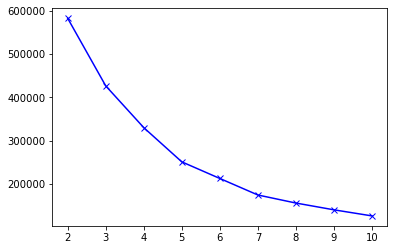

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

temp = stats[["FGA","Year"]]

Sum_of_squared_distances = []
Scores = []
for i in range(2,11):
    Kmodel = KMeans(n_clusters = i).fit(temp)
    Scores.append(metrics.silhouette_score(temp, Kmodel.labels_, metric='euclidean'))
    Sum_of_squared_distances.append(Kmodel.inertia_)
Kmodel = KMeans(n_clusters = Scores.index(max(Scores)) + 2).fit(temp)
fig = px.scatter(temp,x=temp['FGA'],y=temp['Year'],color=Kmodel.labels_)
fig.show()
plt.plot(range(2,11),Sum_of_squared_distances,'bx-')
